# Gaussian Process for Regression
In the project, we implement the gaussin process (GP) for regression. We split the data into train set and test set. Then, the predict distribution of the new data would be visualized. Otherwise, in the gaussian process, we use differen kernel by setting the different value of theta. Finally, we compare the results of different kernels, and use automatic relevance determination (ARD) to select the value of parameters. 

### 1. Import Modules

In [1]:
import scipy.io as io
from gaussian_process import GP

### 2. Data
The data 'gp.mat' contain 100 data and 100 targets. We use the first 60 as the training set, and the last 40 as the testing set.

In [2]:
data = io.loadmat('gp.mat')
x = data['x']
t = data['t']

train_num = 60
x_train = x[:train_num, :]
x_test = x[train_num:, :]
t_train = t[:train_num]
t_test = t[train_num:]

### 3. Training and Predicting Results
We use different value of theta to represent different kernels. Then, we train the model and plot the predict results. Otherwise, calculate the root-mean-square error of the training set and the testing set. We can compare the results of different value of theta.

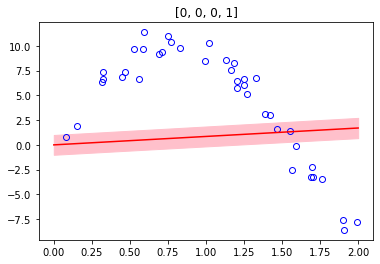

train error: 6.66  test error: 6.749


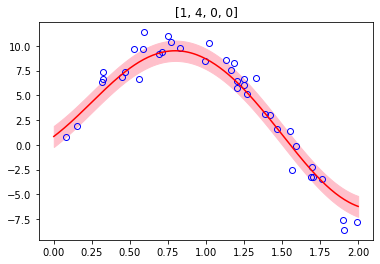

train error: 1.05  test error: 1.299


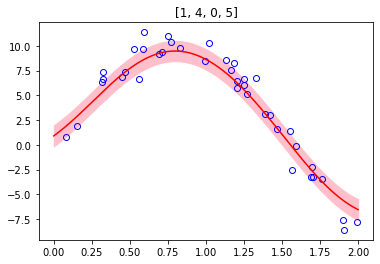

train error: 1.03  test error: 1.286


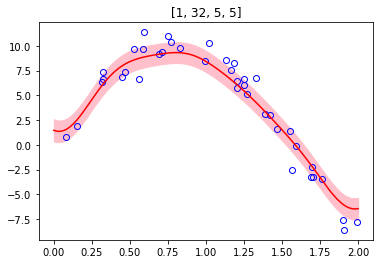

train error: 0.96  test error: 1.258


In [3]:
theta_list = [[0, 0, 0, 1],
              [1, 4, 0, 0],
              [1, 4, 0, 5],
              [1, 32, 5, 5]]

for i, thetas in enumerate(theta_list):
    gp = GP(thetas=thetas)
    gp.train(x_train, t_train)
    gp.plot(x_test, t_test, title=f"theta_{i}")
    train_error, test_error = gp.rms_error()
    
    print(f'train error: {train_error:>.2f}  test error: {test_error:>.3f}')

### 3. Automatic Relevance Detemination
Generally, we have to set the the value of hyper-parameters by ourselves. However, we can use ARD to set the value of theta automatically. 

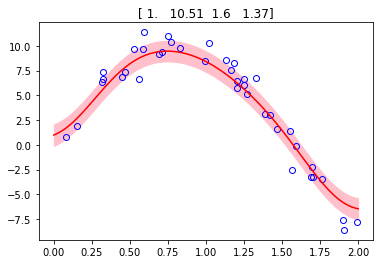

train error: 0.97  test error: 1.240


In [4]:
gp.ard()
gp.plot(x_test, t_test, "ARD")
train_error, test_error = gp.rms_error()
print(f'train error: {train_error:>.2f}  test error: {test_error:>.3f}')